# **Лабораторная работа 2.** Цифровые аналоги классический фильтров.


Вариант 1



---


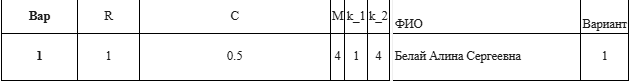

# 1. Дискретизация функции отклика

Задача: построить цифровой фильтр с помощью дискретизации функции отклика RC цепочки. Для этого:
1. Выберем шаг дискретизации.Рассмотрим дискретныйфильтр, функцией которого будет дискретизация функции отклика моей RC цепочки.

Посмотрим, как будет выглядеть  функция отклика. Для этого составим дифференциальное уравнение

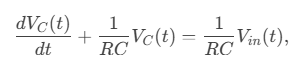

где 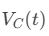 описывает напряжение на конденсаторе.

Пусть 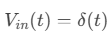, тогда

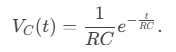


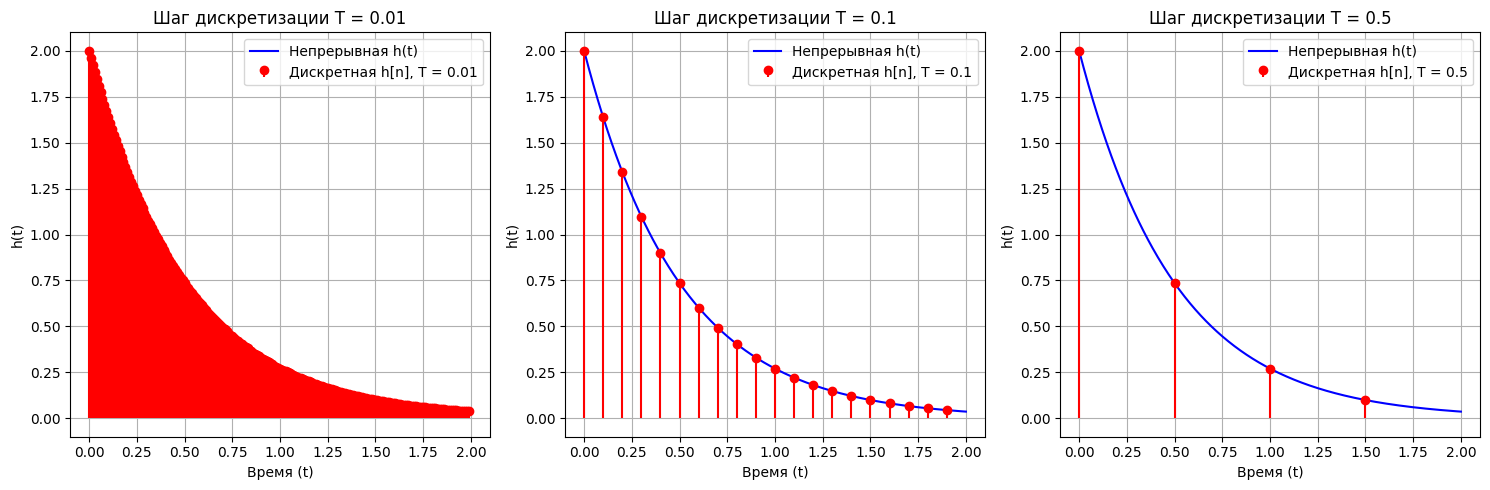

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
R = 1.0       # Сопротивление
C = 0.5       # Ёмкость
tau = R * C   # Постоянная времени

# Время для дискретизации
t_continuous = np.linspace(0, 2, 500)  # Непрерывное время для построения h(t)

# Импульсная характеристика RC-цепочки (непрерывная)
h_t = (1 / (R * C)) * np.exp(-t_continuous / (R * C))

# Шаги дискретизации
T_values = [0.01, 0.1, 0.5]  # Разные значения T

# Создание фигуры с тремя подграфиками
plt.figure(figsize=(15, 5))

for i, T in enumerate(T_values):
    # Дискретные моменты времени
    n = np.arange(0, int(2 / T))  # Дискретные моменты времени
    t_discrete = n * T             # Непрерывное время для дискретных точек

    # Дискретизированная импульсная характеристика
    h_n = (1 / (R * C)) * np.exp(-t_discrete / (R * C))

    # Построение подграфика
    plt.subplot(1, 3, i + 1)
    plt.plot(t_continuous, h_t, 'b-', label='Непрерывная h(t)')
    plt.stem(t_discrete, h_n, 'r', label=f'Дискретная h[n], T = {T}', basefmt=" ")
    plt.title(f'Шаг дискретизации T = {T}')
    plt.xlabel('Время (t)')
    plt.ylabel('h(t)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

Сравним три шага дискретизации.

В данном случае мы можем явно видеть, что шаг дискретизации Т = 0.01 явно избыточен, хоть и передает функцию максимально точно.

Шаг дискретизации Т = 0.1 передает функцию корректно и не является избыточным, считаю, что это значение оптимально.

Шаг дискретизации Т = 0.5 Слишком велик, точки редкие и соответсвенно апроксимация плохая.
Остановимся на шаге Т = 0.1

2. Сделаем вывод о физическойреализуемости и усточивости фильтра:

-- Воспользуемся теоремой, которая гласит, что фильтр физически реализуем тогда и только тогда, когда его импульсная характеристика h(t) = 0 для всех t < 0.
Наша функция имеет вид

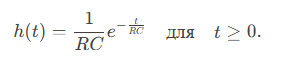

соответственно, для всех t < 0 h(t)=0. Таким образом, делаем вывод, что фильтрфизически реализуем.

-- Проверим устойчивость:
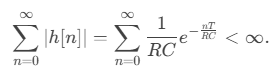
Ряд сходится, значит фильтр усточив.

3. Найдем передаточную функцию дискретного фильтра (Z-преобразование функции отклика). Вычислим ее полюсы.

Для этого выполним следующие преобразования:

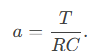

Импульсная характеристика имеет вид для n > 0:
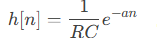

Подставим в уравнение z-преобразования
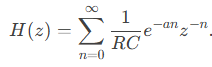
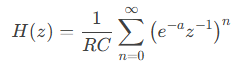
Это бесконечная геометрическая прогрессия => сумма ряда равна

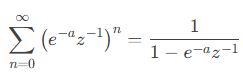

Итог: 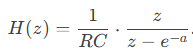

Найдем полюсы:
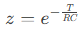

Полюс лежит внутри единичной окружности

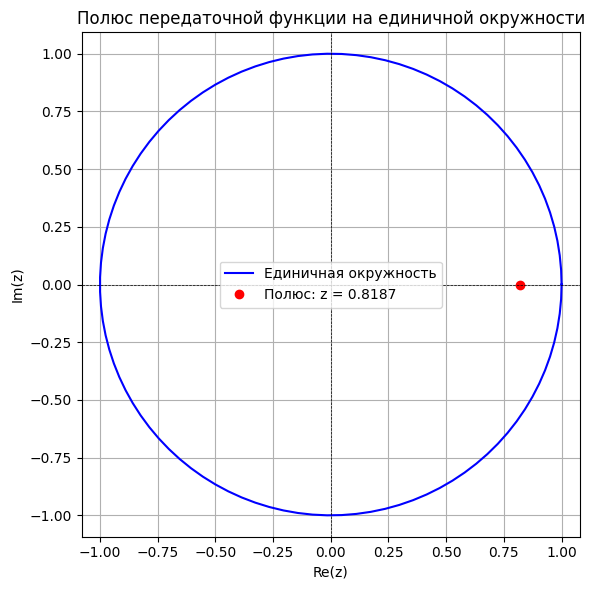

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
R = 1.0
C = 0.5
T = 0.1

# Постоянная времени RC-цепочки
tau = R * C

# Параметр a
a = T / (R * C)

# Полюс передаточной функции
pole = np.exp(-a)

# Построение единичной окружности
theta = np.linspace(0, 2 * np.pi, 100)  # Углы от 0 до 2π
x_circle = np.cos(theta)
y_circle = np.sin(theta)

# Построение графика
plt.figure(figsize=(6, 6))

# Единичная окружность
plt.plot(x_circle, y_circle, 'b-', label='Единичная окружность')

# Полюс
plt.plot(np.real(pole), np.imag(pole), 'ro', label=f'Полюс: z = {pole:.4f}')

# Настройки графика
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.title('Полюс передаточной функции на единичной окружности')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.legend()
plt.grid(True)
plt.axis('equal')

plt.tight_layout()
plt.show()

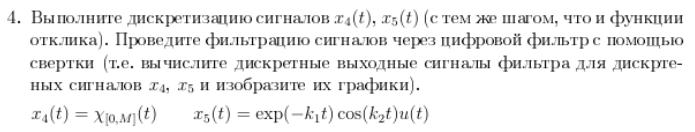

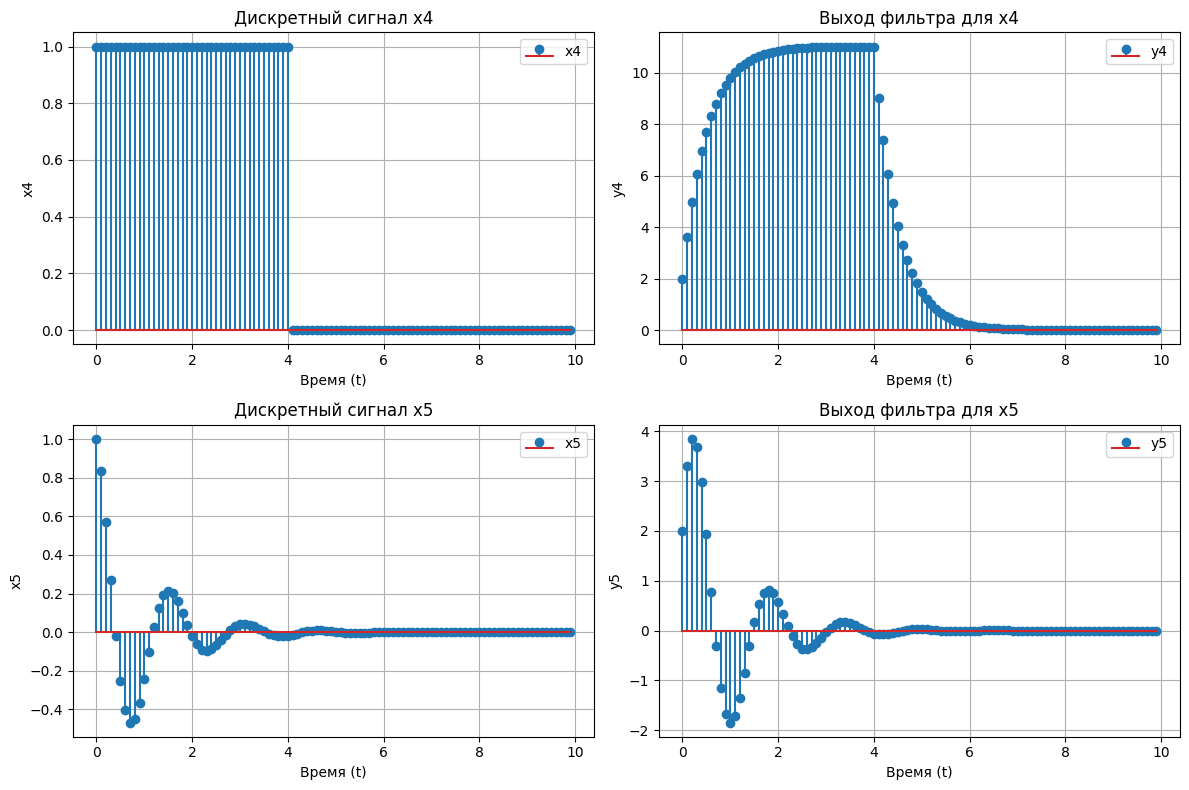

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
R = 1.0
C = 0.5
T = 0.1
M = 4
k1 = 1
k2 = 4

# Постоянная времени RC-цепочки
tau = R * C

# Импульсная характеристика фильтра
n = np.arange(0, 50)  # Дискретные моменты времени
h_n = (1 / (R * C)) * np.exp(-n * T / (R * C))

# Дискретизация сигнала x_4(t)
def x4(t):
    return 1 if 0 <= t <= M else 0

t_samples = np.arange(0, 10, T)  # Временные отсчеты
x4_samples = np.array([x4(t) for t in t_samples])

# Дискретизация сигнала x_5(t)
def x5(t):
    return np.exp(-k1 * t) * np.cos(k2 * t) if t >= 0 else 0

x5_samples = np.array([x5(t) for t in t_samples])

# Свертка для фильтрации
y4 = np.convolve(x4_samples, h_n, mode='full')[:len(t_samples)]  # Выход для x4
y5 = np.convolve(x5_samples, h_n, mode='full')[:len(t_samples)]  # Выход для x5

# Построение графиков
plt.figure(figsize=(12, 8))

# График x4(t) и его фильтрация
plt.subplot(2, 2, 1)
plt.stem(t_samples, x4_samples, label='x4')
plt.title('Дискретный сигнал x4')
plt.xlabel('Время (t)')
plt.ylabel('x4')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.stem(t_samples, y4, label='y4')
plt.title('Выход фильтра для x4')
plt.xlabel('Время (t)')
plt.ylabel('y4')
plt.legend()
plt.grid(True)

# График x5(t) и его фильтрация
plt.subplot(2, 2, 3)
plt.stem(t_samples, x5_samples, label='x5')
plt.title('Дискретный сигнал x5')
plt.xlabel('Время (t)')
plt.ylabel('x5')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.stem(t_samples, y5, label='y5')
plt.title('Выход фильтра для x5')
plt.xlabel('Время (t)')
plt.ylabel('y5')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Вывод:

-- для x4:

Входной сигнал имеет прямоугольный импульс. После фильтрации на выходе получаем более сглаженный график

-- для x5:

Входной сигнал представляет собой косинусоидный сигнал. Также мы можем видеть, что он постепенно затухает. На выходе фильтра получаем почти такой же график, но амплитуда увеличилась.


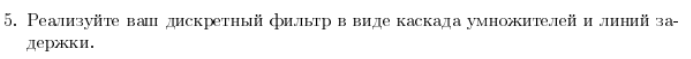

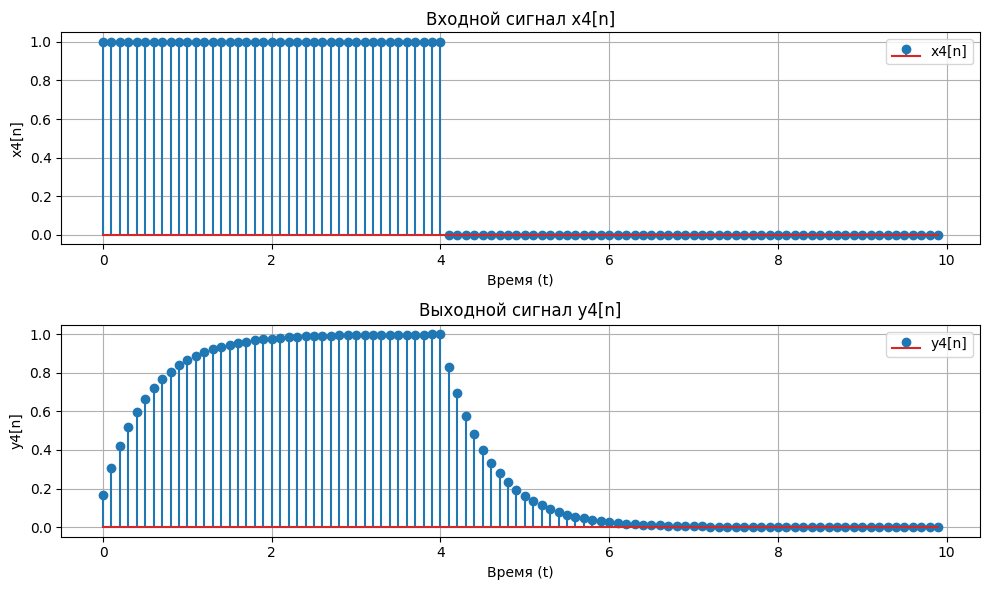

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



# Параметры
R = 1.0
C = 0.5
T = 0.1
alpha = T / (R * C)  # Параметр alpha = T / (RC)

# Правильные коэффициенты a и b
a = 1 / (1 + alpha)  # Коэффициент a
b = alpha / (1 + alpha)  # Коэффициент b
# Входной сигнал (прямоугольный импульс)
def x4(t):
    return 1 if 0 <= t <= 4 else 0

# Функция фильтра
def filter(x, a, b):
    y = []  # Инициализация выходного сигнала
    y.append(b * x[0])  # Начальное условие
    for n in range(1, len(x)):
      # y[n - 1] - линия задержки
      # каскад умножителей реализован через умножение на a и b
      y.append(a * y[n-1] + b * x[n])  # Разностное уравнение
    return y

t_samples = np.arange(0, 10, T)  # Временные отсчеты
x_samples = np.array([x4(t) for t in t_samples])  # Дискретный сигнал x4[n]

# Фильтрация

y_samples = filter(x_samples, a, b)

# Построение графиков
plt.figure(figsize=(10, 6))

# Входной сигнал
plt.subplot(2, 1, 1)
plt.stem(t_samples, x_samples, label='x4[n]')
plt.title('Входной сигнал x4[n]')
plt.xlabel('Время (t)')
plt.ylabel('x4[n]')
plt.legend()
plt.grid(True)

# Выходной сигнал
plt.subplot(2, 1, 2)
plt.stem(t_samples, y_samples, label='y4[n]')
plt.title('Выходной сигнал y4[n]')
plt.xlabel('Время (t)')
plt.ylabel('y4[n]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Можем увидеть, что выходной сигнал в результате получился очень похожим на выходной сигнал при использовании свертки.

# 2. Замена дифференциального уравнения разностным.


Задача: Построить цифровой фильтр с помощью замены дифференциального уравнения RC цепочки на разностьное



1. Напишем дифференциальное уравнение RC цепочки:

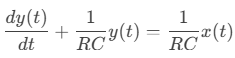

Для дискретизации заменим производную разностной аппроксимацией:
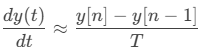

Теперь подставим это в уравнение:

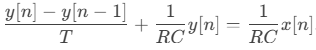

упростим и обозначим 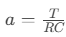 и получим в итоге:

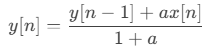

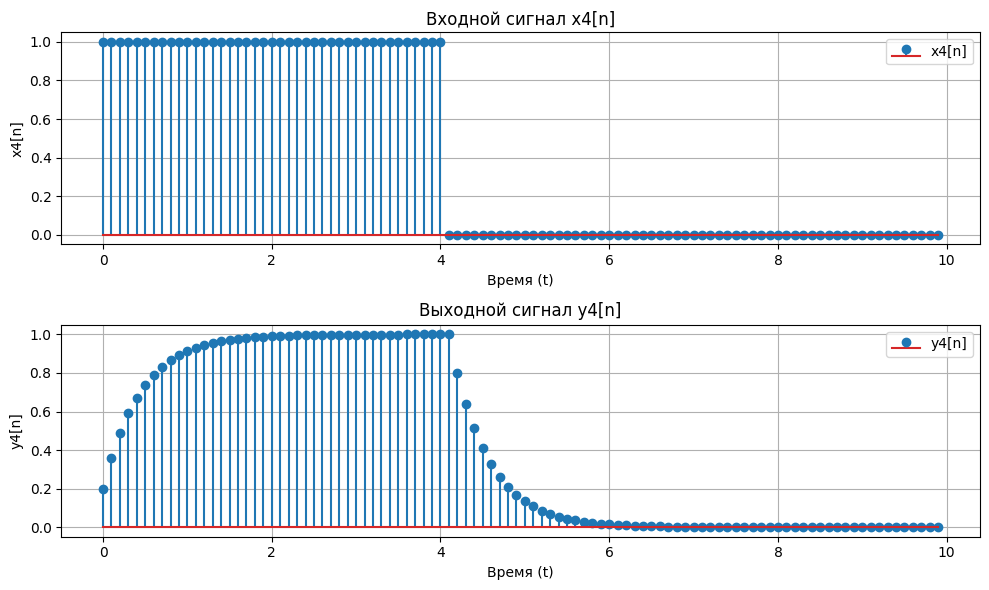

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
R = 1.0
C = 0.5
T = 0.1
alpha = T / (R * C)  # Параметр alpha = T / (RC)

# Разностное уравнение: y[n] = (y[n-1] + alpha * x[n]) / (1 + alpha)
# Функция фильтра
def f(x, alpha):
    y = []  # Инициализация выходного сигнала
    y.append(alpha*x[0])
    for n in range(1, len(x)):  # Цикл по времени
        y.append((1-alpha)*y[n-1] + alpha*x[n-1])  # Разностное уравнение
    return y

# Входной сигнал (прямоугольный импульс)
def x4(t):
    return 1 if 0 <= t <= 4 else 0

# Дискретизация входного сигнала
t_samples = np.arange(0, 10, T)  # Временные отсчеты
x_samples = np.array([x4(t) for t in t_samples])  # Дискретный сигнал x4[n]

# Фильтрация
y_samples = f(x_samples, alpha)

# Построение графиков
plt.figure(figsize=(10, 6))

# Входной сигнал
plt.subplot(2, 1, 1)
plt.stem(t_samples, x_samples, label='x4[n]')
plt.title('Входной сигнал x4[n]')
plt.xlabel('Время (t)')
plt.ylabel('x4[n]')
plt.legend()
plt.grid(True)

# Выходной сигнал
plt.subplot(2, 1, 2)
plt.stem(t_samples, y_samples, label='y4[n]')
plt.title('Выходной сигнал y4[n]')
plt.xlabel('Время (t)')
plt.ylabel('y4[n]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

2. Найдем передаточную функцию дискретного фильтра (используя свойства z-преобразования)
Применим к разностному уравнению преобразование 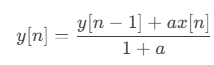

в итоге получим

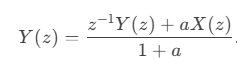

решим относительно Y(z):

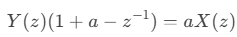

Определим

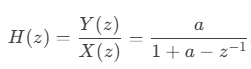

тут передаточная функция принимает вид 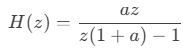

3. Предполагая дискретный фильтр физически реализуемым, найдите функцию отклика фильтра. Исследуйте устойчивость фильтра.

Выше мы уже вывели функцию отклика. Она соответствует следующей функции:

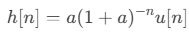


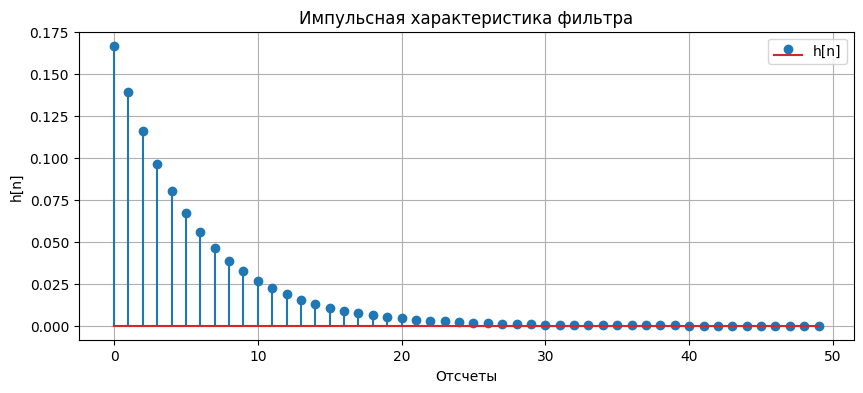

Полюс фильтра: 0.8333333333333334
Фильтр устойчив (полюс внутри единичной окружности).


In [ ]:
# Импульсная характеристика фильтра
impulse = np.zeros(50)
impulse[0] = 1  # Единичный импульс
h_n = filter(impulse, a, b)  # Импульсная характеристика

# Построение графика импульсной характеристики
plt.figure(figsize=(10, 4))
plt.stem(h_n, label='h[n]')
plt.title('Импульсная характеристика фильтра')
plt.xlabel('Отсчеты')
plt.ylabel('h[n]')
plt.legend()
plt.grid(True)
plt.show()

# Устойчивость фильтра
pole = a  # Полюс передаточной функции
print(f"Полюс фильтра: {pole}")
if abs(pole) < 1:
    print("Фильтр устойчив (полюс внутри единичной окружности).")
else:
    print("Фильтр неустойчив (полюс вне единичной окружности).")

В выводе программы мы можем увидеть, что Фильтр устойчив (полюс внутри единичной окружности)

4. Выполните дискретизацию сигналов x4(t), x5​(t) (с тем же шагом, что и функции отклика). Проведите фильтрацию сигналов через построенный цифровой фильтр с помощью свертки (т.е. вычислите дискретные выходные сигналы фильтра для дискуртных сигналов x4, x5 и изобразите их графики)

Выходной сигнал y[n] вычисляется как свертка входного сигнала x[n] с импульсной характеристикой h[n]:

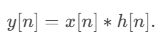

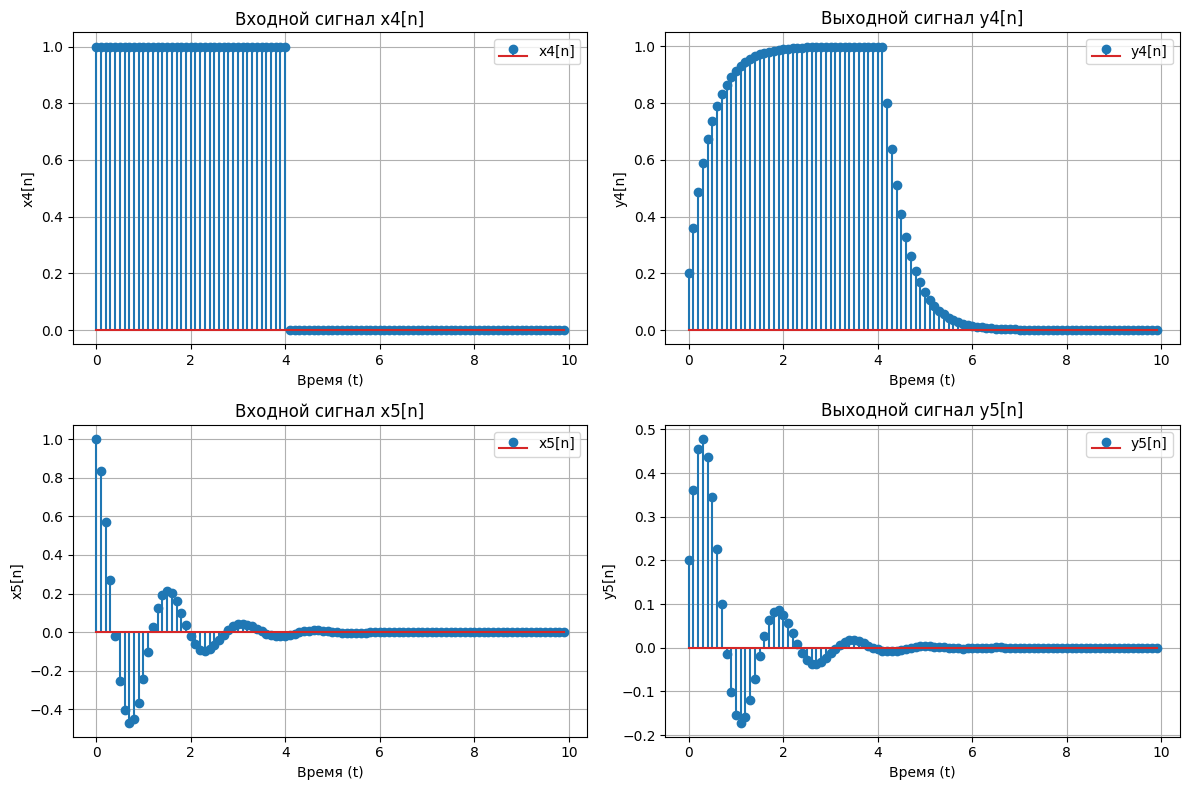

In [ ]:
# Входные сигналы
def x4(t):
    return 1 if 0 <= t <= 4 else 0  # Прямоугольный импульс

def x5(t):
    return np.exp(-1 * t) * np.cos(4 * t) if t >= 0 else 0  # Затухающий косинус

# Дискретизация сигналов
t_samples = np.arange(0, 10, T)  # Временные отсчеты
x4_samples = np.array([x4(t) for t in t_samples])  # Дискретный сигнал x4[n]
x5_samples = np.array([x5(t) for t in t_samples])  # Дискретный сигнал x5[n]

# Фильтрация сигналов
y4_samples = f(x4_samples, alpha)  # Выход для x4[n]
y5_samples = f(x5_samples, alpha)  # Выход для x5[n]

# Построение графиков
plt.figure(figsize=(12, 8))

# График x4[n] и y4[n]
plt.subplot(2, 2, 1)
plt.stem(t_samples, x4_samples, label='x4[n]')
plt.title('Входной сигнал x4[n]')
plt.xlabel('Время (t)')
plt.ylabel('x4[n]')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.stem(t_samples, y4_samples, label='y4[n]')
plt.title('Выходной сигнал y4[n]')
plt.xlabel('Время (t)')
plt.ylabel('y4[n]')
plt.legend()
plt.grid(True)

# График x5[n] и y5[n]
plt.subplot(2, 2, 3)
plt.stem(t_samples, x5_samples, label='x5[n]')
plt.title('Входной сигнал x5[n]')
plt.xlabel('Время (t)')
plt.ylabel('x5[n]')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.stem(t_samples, y5_samples, label='y5[n]')
plt.title('Выходной сигнал y5[n]')
plt.xlabel('Время (t)')
plt.ylabel('y5[n]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

5. Сравните результаты фильтрации дискуртных сигналов x4, x5 с результатами фильтрации этих же сигналов для фильтра с дискретизацией функции отклика.

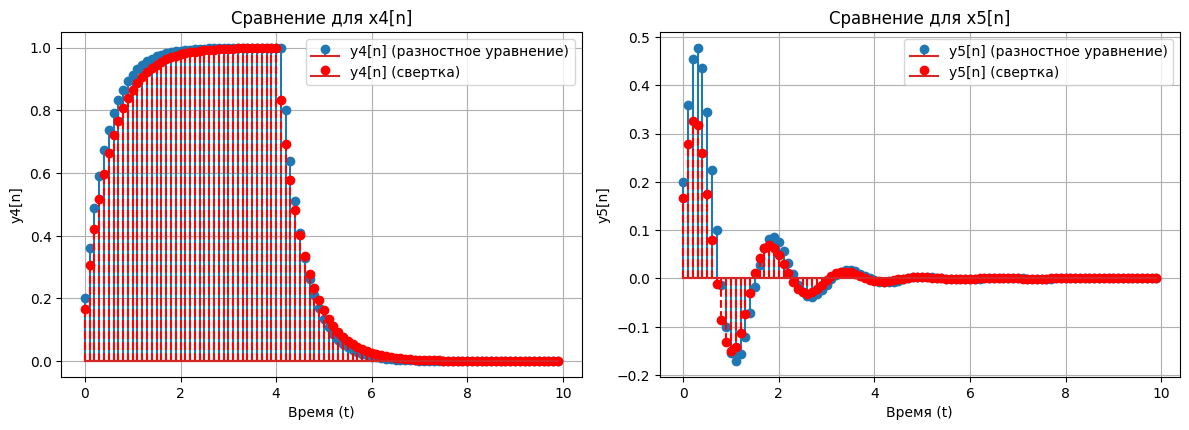

In [ ]:
# Фильтрация через свертку с импульсной характеристикой
y4_conv = np.convolve(x4_samples, h_n, mode='full')[:len(t_samples)]
y5_conv = np.convolve(x5_samples, h_n, mode='full')[:len(t_samples)]

# Построение графиков для сравнения
plt.figure(figsize=(12, 8))

# Сравнение для x4[n]
plt.subplot(2, 2, 1)
plt.stem(t_samples, y4_samples, label='y4[n] (разностное уравнение)')
plt.stem(t_samples, y4_conv, label='y4[n] (свертка)', linefmt='r--', markerfmt='ro')
plt.title('Сравнение для x4[n]')
plt.xlabel('Время (t)')
plt.ylabel('y4[n]')
plt.legend()
plt.grid(True)

# Сравнение для x5[n]
plt.subplot(2, 2, 2)
plt.stem(t_samples, y5_samples, label='y5[n] (разностное уравнение)')
plt.stem(t_samples, y5_conv, label='y5[n] (свертка)', linefmt='r--', markerfmt='ro')
plt.title('Сравнение для x5[n]')
plt.xlabel('Время (t)')
plt.ylabel('y5[n]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

В результате сравнения мы можем увидеть, что итоговые графики очень близки. При этом, на втором графике для x5 мы можем сильнее заметить, что амплитуда графика свертки меньше, чем амплитуда разностного уравнения.